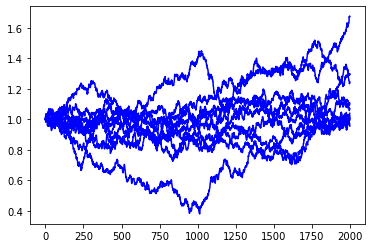

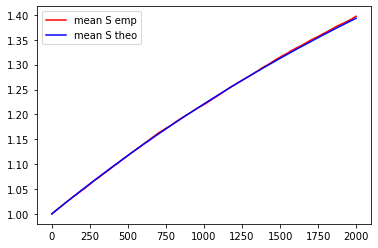

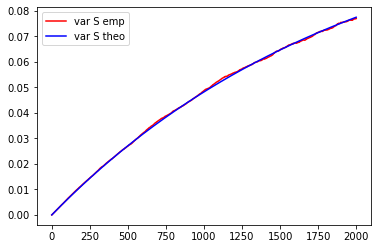

In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt

T = 1.0
nb_simu = 10000
nb_time = 2000

theta = 1.0
kappa = .5
sigma = .35

dt = T / float(nb_time)
dt_sqrt = math.sqrt(dt)

dW_t = np.random.normal(.0, 1.0, nb_simu * nb_time) * dt_sqrt

S0 = 1.0
S = np.zeros((nb_simu, nb_time))
t = np.arange(0, T, dt)

for i in range(0, nb_simu):
    S[i][0] = S0
  
for i in range(0, nb_simu):
    for j in range(1, nb_time):
        S[i][j] = S[i][j-1] + (theta - kappa * S[i][j-1]) * dt + sigma * dW_t[i * nb_time + j]
        
for i in range(0, 10):
    plt.plot(S[i], color='blue')
plt.show()
    
mean_S_emp = np.zeros((nb_time))
var_S_emp = np.zeros((nb_time))

mean_S_theo = S0 * np.exp(- kappa * t) + theta / kappa * (1.0 - np.exp(- kappa * t))
var_S_theo = sigma * sigma / (2.0 * kappa) * (1.0 - np.exp(- 2 * kappa * t))

for i in range(0, nb_time):
    mean_S_emp[i] = np.mean(S[:,i])
    var_S_emp[i] = np.var(S[:,i])
 
plt.plot(mean_S_emp, color='red', label='mean S emp')
plt.plot(mean_S_theo, color='blue', label='mean S theo')
plt.legend()
plt.show()                            
                            
plt.plot(var_S_emp, color='red', label='var S emp')
plt.plot(var_S_theo, color='blue', label='var S theo')
plt.legend()
plt.show()

Change measure by Girsanov theorem

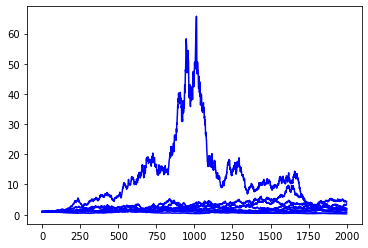

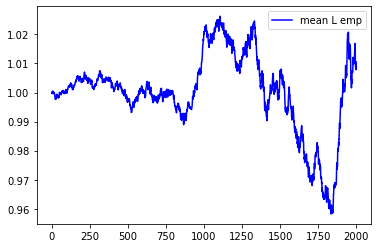

In [24]:
# find L

L = np.zeros((nb_simu, nb_time))

for i in range(0, nb_simu):
    L[i][0] = 1.0

for i in range(0, nb_simu):
    for j in range(1, nb_time):
        L[i][j] = L[i][j-1] - L[i][j-1] * (theta - kappa * S[i][j-1]) / sigma * dW_t[i * nb_time + j]

for i in range(0, 10):
    plt.plot(L[i], color='blue') 
    
plt.show()
        
mean_L_emp = np.zeros((nb_time))

for i in range(0, nb_time):
    mean_L_emp[i] = np.mean(L[:,i])

plt.plot(mean_L_emp, color='blue', label='mean L emp')
plt.legend()
#plt.ylim([, +0.2])
plt.show()




Expectation under new measure

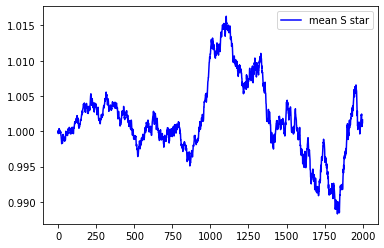

[1.         0.99967574 1.00011814 ... 1.00157206 1.0011201  1.00160359]


In [25]:
mean_S_star = np.zeros((nb_time))

for i in range(0, nb_time):
    mean_S_star[i] = np.mean(np.multiply(S[:,i],L[:,i]))
 
plt.plot(mean_S_star, color='blue', label='mean S star')
plt.legend()
plt.show()

print(mean_S_star)